In [1]:
import numpy as np
import torch as pt
import matplotlib.pyplot as plt
import sys
from pathlib import Path
sys.path.append(Path('../src'))
from tfim_hamiltonian_open_fermion import TfimHamiltonianOpenFermion
from bf_quantum_state import BFQuantumState

In [2]:
#global variables
ratios_h_j = np.array([0.01, 0.02, 0.05, 0.1,
                           0.2, 0.5, 1, 2, 5, 10, 20, 50, 100], dtype=float)
save_direc_eigs = Path('data/Diagonal_hamiltonian/eigenvalues_first_three_dict.npy')
save_direc_groundstate = Path('data/Diagonal_hamiltonian/groundstate_dict.npy')

In [3]:
energy_shadow = np.zeros(np.size(ratios_h_j))
for i in range(0, np.size(ratios_h_j)):
    energy_shadow[i] = TfimHamiltonianOpenFermion(12, ratios_h_j[i],
                                             1, 'periodic').energy_shadow(None, 10)

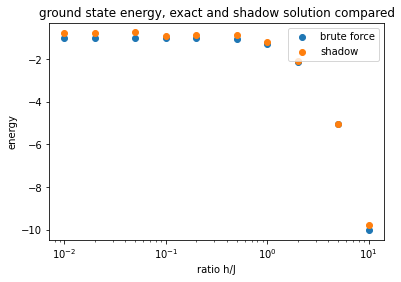

In [4]:
qubit_num = np.array([12])
energy_dict = np.load(save_direc_eigs, allow_pickle='TRUE')
energy_dict = energy_dict.item()

energy_brute = np.zeros(np.size(ratios_h_j))
for j in range(0, np.size(ratios_h_j)):
    energy_brute[j] = energy_dict[str(1)]['periodic'][str(qubit_num[0])][str(ratios_h_j[j])][0]
plt.title('ground state energy, exact and shadow solution compared')
plt.xlabel('ratio h/J')
plt.ylabel('energy')
plt.xscale('log')
plt.scatter(ratios_h_j[:-3], energy_brute[:-3]/qubit_num[0], label='brute force')
plt.scatter(ratios_h_j[:-3], energy_shadow[:-3] / qubit_num[0], label='shadow')
plt.legend()

Now we just plot the errors.

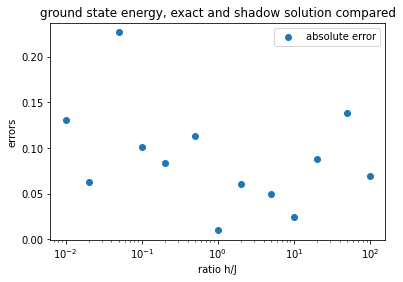

In [13]:
plt.title('ground state energy, exact and shadow solution compared')
plt.xlabel('ratio h/J')
plt.ylabel('errors')
plt.xscale('log')
plt.scatter(ratios_h_j, np.abs(energy_brute -  energy_shadow)/qubit_num, label='absolute error')
plt.legend()

We can see that it is randomly distributed.
We want to see how the summed up absolute error scales with the number of measurements
per observable.

In [16]:
qubit_num = 12
num_of_measurements_per_observable = np.array([1, 2, 5, 10, 20, 30, 50, 100])
energies_shadow = np.zeros((np.size(num_of_measurements_per_observable),np.size(ratios_h_j)))
for i in range(0, np.size(num_of_measurements_per_observable)):
    for j in range(0, np.size(ratios_h_j)):
        energies_shadow[i][j] = TfimHamiltonianOpenFermion(qubit_num, ratios_h_j[j],
                                             1, 'periodic').energy_shadow(None, num_of_measurements_per_observable[i])

In [17]:
errors = np.zeros(np.size(num_of_measurements_per_observable))
for i in range(0, np.size(num_of_measurements_per_observable)):
    errors[i] = np.sum(np.abs(energy_brute - energies_shadow[i]))
print(errors)

[29.47492256 25.8155637  29.08335401 15.18167098 18.8183071  17.45779989
 18.0225071  17.79635401]


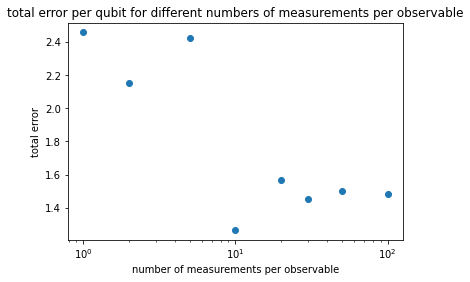

In [18]:
plt.title('total error per qubit for different numbers of measurements per observable')
plt.xlabel('number of measurements per observable')
plt.ylabel('total error')
plt.xscale('log')
plt.scatter(num_of_measurements_per_observable, errors / qubit_num)